# Exploratory data analysis on women in STEM

### What is in this notebook?

STEM, which stands for science, technology, engineering and math produces many job opportunities in US. However, it is reported by U.S. Department of Commerce that women comprise 48 percent of the U.S. workforce but just 24 percent of STEM workers. This is means half as many women are working in STEM jobs. 

In this notebook, I am using the survey data from the Scientists and Engineers Statistical Data System (SESTAT), the leading surveys for studying the science and engineering (STEM) workforce in the United States. The data I have obtained here will cover ten years span, from 2003 to 2013. I will study the gender and race discrepancy in STEM jobs, as well as the pay gap, principal job fields. This will answer some question we have: how did these data compare with national data of all jobs, how it evolve over the years, and if there are certain job fields better than other?

## Importing Modules and Data

In [1]:
# import stuff
import numpy as np
import pandas as pd

In [2]:
# import visulization modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [3]:
#import the data from csv file with a series of NAN values 
df3 = pd.read_csv('./../data/highered_00004.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )

#'REFID' contains two data types and is repeated info from 'PERSONID'. Column dropped. 
df3 = df3.drop(['REFID'], axis=1)

# import the second data 
df2 = pd.read_csv('./../data/highered_00007.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )

In [4]:
#merge the two data frame
df = df3.merge(df2,  on=['PERSONID', 'YEAR', 'WEIGHT', 'SAMPLE', 'SURID'])
df.head(5)

,PERSONID,YEAR,WEIGHT,SAMPLE,SURID,AGE,BIRYR,GENDER,MINRTY,RACETH,...,WAPRSM,ACTCAP,ACTDED,ACTMGT,ACTRD,ACTRDT,ACTRES,ACTTCH,NRREA,WKTRNI
0,50000030000000003,2003,372.6047,601,1,47,1955,1,0,2,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0
1,50000030000000004,2003,341.7484,601,1,66,1935,2,0,2,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0
2,50000030000000005,2003,522.5629,601,1,60,1940,1,0,2,...,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,50000030000000006,2003,135.0212,601,1,30,1970,2,0,2,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,1.0
4,50000030000000104,2003,907.4463,601,1,68,1935,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


**Use string catagorical data to replace numerical data for simple EDA**

In [5]:
min_map = {0: 'Not minority', 1: 'Minority'}
df['MNTRS'] = df['MINRTY'].map(min_map)

gen_map = {1: 'Female', 2: 'Male'}
df['GENDERS'] = df['GENDER'].map(gen_map)

major_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['MajorS'] = df['NDGMEMG'].map(major_map)

job_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['JobS'] = df['NOCPRMG'].map(job_map)

race_map = {1: 'Asian', 2: 'White', 3: 'Other Minorities', 4: 'Other'}
df['RACES'] = df['RACETH'].map(race_map)

LF_map = {1: 'Employed', 2: 'Unemployed'}
df['LFSTATS'] = df['LFSTAT'].map(LF_map)
df['LFSTATS'] = df['LFSTATS'].replace(3,np.NaN)

birth_map = {0: 'Not in the US', 1: 'Born in the US'}
df['BUSS'] = df['BTHUS'].map(birth_map)

JS_map = {1: 'Satisfied', 2: 'Satisfied', 3: 'Dissatisfied', 4: 'Dissatisfied'}
df['JobSatis'] = df['JOBSATIS'].map(JS_map)
df_gender_satisfy = df.groupby('GENDERS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()

JR_map = {1: 'Related', 2: 'Related', 3: 'Not Related'}
df['JobR'] = df['OCEDRLP'].map(JR_map)

**Drop irrelevant columns and columns with mostly missing data**

In [6]:
df = df.drop(['MINRTY','GENDER','RACETH','BTHUS','FNVS', 'CHTOT', 'CTZUS','NBAMEMG','NBAMED', 'BA03Y5','NRREA' ],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478747 entries, 0 to 478746
Data columns (total 44 columns):
PERSONID    478747 non-null int64
YEAR        478747 non-null int64
WEIGHT      478737 non-null float64
SAMPLE      478747 non-null int64
SURID       478747 non-null int64
AGE         478747 non-null int64
BIRYR       478747 non-null int64
CTZUSIN     478747 non-null int64
DGRDG       478747 non-null int64
HD03Y5      478747 non-null int64
NDGMED      478747 non-null int64
NDGMEMG     478747 non-null int64
LFSTAT      478747 non-null int64
WRKG        478747 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-null float64
LOOKWK      71269 non-null float64
OCEDRLP     407478 non-null float64
NOCPR       407478 non-null float64
NOCPRMG     407478 non-null float64
SALARY      407478 non-null float64
CPI2009C    478747 non-null float64
JOBSATIS    407478 non-null float64
EMSEC       407478 non-null float64
EMSIZE      407478 non-null float64
GOVSUP      4286

** Make some portional data frames for easy manipulation **

In [8]:
#a data frme for master, doctorate and professional degrees 
df_graduate = df[(df['DGRDG'] == 2) | (df['DGRDG'] == 3) | (df['DGRDG'] == 4)]

df_dr = df[(df['DGRDG'] == 3) ]
df_prof = df[(df['DGRDG'] == 4) ]

In [9]:
#a data frame only contains those employed in STEM fields
df_stem = df[df['NOCPRMG']!=7]

In [10]:
#a data frame for undergraduates only 
df_CR = df[(df['SAMPLE']==601) | (df['SAMPLE']==603) | (df['SAMPLE']==1001)]
df_undergraduate = df[(df['DGRDG'] == 1)]

In [11]:
#a data frame for 2003 survey only 
df_2003 = df[df['YEAR']==2003]

#a data frame for 2013 survey only 
df_2013 = df[df['YEAR']==2013]

## Exploratory Data Analysis 

## General question: How is the age and salary distribution for the data?##
The KDE pair plot with Age and SALARY shows the distributions and relationships between the two columns. 
It is presented below that:
1. The age distributes evenly between 30 and 60. There is s slight peak right before 30 and a tail after 60.
2. The distribution of salary appears to be bimodal: one peak at around 60,000 and one sharp peak at 150,000. The reason for the 150,000 peak is from the capped value of this column. 
3. Younger people makes less money generally. 
4. The salary goes up when they are at an older age, until around 50 years old. 


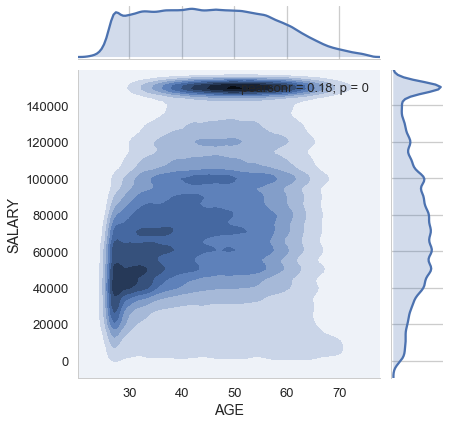

In [12]:

sns.jointplot(x='AGE',y='SALARY',data=df, kind='kde')

## How much do women comprise the US STEM jobs?##

It is reported by U.S. Department of Commerce that women comprise 48 percent of the U.S. workforce but just 24 percent of STEM workers. We can do a quick check of the STEM jobs to see how does the female percentage look like over the years. 

Note that we use df_stem here to choose only the data frame contains STEM workers. We are also only looking at the data when the individual is employed. 

The bar plot shows about 33% of the STEM workers are women, from this set of data. The number differs from the 24% reported by the U.S. workforce. Several reasons could be contributing to it. First of all, there might be a gender bias in the volunteer based survey. There might simply be more men willign to take the survey than women. Also, the report by U.S. workforce might be based on a data from a different year. 

Nevertheless, a increasing trend in the female percentage over the year (2003-2013) is present in this data set. There are more women working in the STEM job fields and it is encouraging!


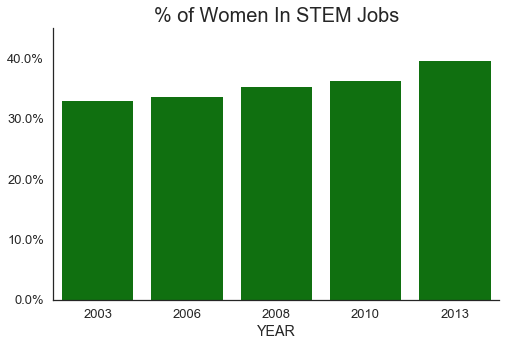

In [13]:
sns.set_style("white")
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
df_female_percentage = df_stem[df_stem['LFSTATS']=='Employed'].groupby('YEAR')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
sns.barplot(x='YEAR', y='Female', data = df_female_percentage, color="green", ax=ax)
ax.set_xlabel('YEAR')
ax.set_ylim([0,0.45])
ax.set_yticks([0,0.1,0.2,0.3,0.4])
ax.set_yticklabels(['{:1.1f}%'.format(x*100) for x in [0,0.1,0.2,0.3,0.4]])
plt.ylabel('')
plt.title('% of Women In STEM Jobs',fontsize=20)
sns.despine()
plt.savefig('./../results/femalepercent1.png',dpi = 150)
sns.set_style('whitegrid')

## What is the unemployment rate for each gender from the STEM community?##
The bar plot below shows the employment rate in the STEM community for the female and male groups. To keep consistent, the unemployed data does not take into account people not in the labor force. It indicates the unemployment rate for all is between 2-5% with around 1% higher rate for women than men. 

The unemployment rate here is about 50% less compared with the data from Bureau of Labor Statistics (https://data.bls.gov/pdq/SurveyOutputServlet). This might come from the survey bias. It could also mean the unemployment rate is lower in the STEM community compared with general population in US. 

In [14]:
df_gender_employ = df.groupby(['YEAR','GENDERS'])['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

In [15]:
LFW_map = {1: 0.0, 2: 1.0, 3: np.NaN}

df['LFSTATW'] = df['LFSTAT'].map(LFW_map)
#only consider the data in the labor force
df_inlf_only = df.dropna(subset=['LFSTATW'])

df_inlf_only['weighted_lfstats']=df_inlf_only['WEIGHT']*df_inlf_only['LFSTATW']

weighted_lfs = df_inlf_only.groupby(['YEAR','GENDERS'])[['weighted_lfstats']].sum().unstack().reset_index()
weight = df_inlf_only.groupby(['YEAR','GENDERS'])[['WEIGHT']].sum().unstack().reset_index()
female_unemployed_rate = weighted_lfs['weighted_lfstats']['Female']/weight['WEIGHT']['Female']
male_unemployed_rate = weighted_lfs['weighted_lfstats']['Male']/weight['WEIGHT']['Male']
d = {'Year': [2003, 2006, 2008, 2010, 2013], 'female': female_unemployed_rate, 'male': male_unemployed_rate}
df_unemployed_rate_weighted = pd.DataFrame(data=d)
#melt the data frame to get ready for seaborn barplot with hues
df_unemployed_rate_weighted_melt = pd.melt(df_unemployed_rate_weighted, id_vars=['Year'], value_vars=['female', 'male'])

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


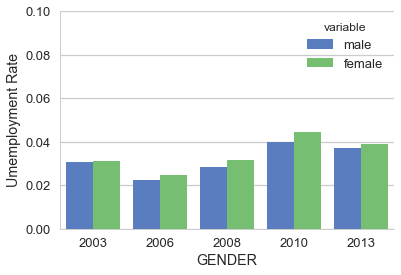

In [16]:
sns.barplot(x='Year', y='value', hue='variable', data = df_unemployed_rate_weighted_melt, hue_order=['male','female'],palette="muted")
plt.xlabel('GENDER')
plt.ylim([0,0.1])
plt.ylabel('Umemployment Rate')
sns.despine()

### A closer look at the unemployment rate###
We have already known that the female umemployment is higher than that of male. Now we take a closer look into the data, in specific, the undergraduate and graduate group data.

In [17]:
employ_ug = df_undergraduate.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_ug_melt = pd.melt(employ_ug.reset_index(), id_vars ='GENDERS')
employed_ug_melt_e = employ_ug_melt[employ_ug_melt['LFSTATS']=='Unemployed']
employed_ug_melt_e['Degree'] = 'Undergraduate'
employ_gr = df_graduate.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_gr_melt = pd.melt(employ_gr.reset_index(), id_vars ='GENDERS')
employed_gr_melt_e = employ_gr_melt[employ_gr_melt['LFSTATS']=='Unemployed']
employed_gr_melt_e['Degree'] = 'Graduate'
employ_dr = df_dr.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_dr_melt = pd.melt(employ_dr.reset_index(), id_vars ='GENDERS')
employed_dr_melt_e = employ_dr_melt[employ_dr_melt['LFSTATS']=='Unemployed']
employed_dr_melt_e['Degree'] = 'Doctorate'
employed_new = pd.concat([employed_ug_melt_e,employed_gr_melt_e,employed_dr_melt_e])

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

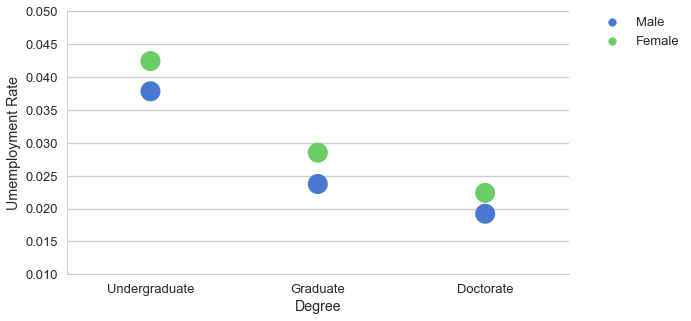

In [18]:
plt.figure(figsize=(8,4.5))
sns.stripplot(x='Degree', y='value', data=employed_new, hue='GENDERS', hue_order=['Male','Female'], size =20, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.ylim([0.01,0.05])
plt.ylabel('Umemployment Rate')

### Observations:###
The dot plot shows the umemployment rate for both female and male in the undergraduate and graduate groups. The trend we see is that the higher the degree is, the lower the unemployment rate is. 

It is clear that the undergraduate group has a 1% unemployment rate difference in men and women. And the disparity stays about the same for the  graduate group. 

The last dot plot shows the unemployment rate for the doctorate group. In this case, the umemployment rate gap shrinks! Can we consider this to be an effective career advice for female students? 

## What is the salary distribution for each gender?##

The box plot below shows the salary in the STEM community for the female and male groups between year 2003 and 2013. Note that the salary is capped at $150,000 thus the could shaped cluster at the top of each violin. 


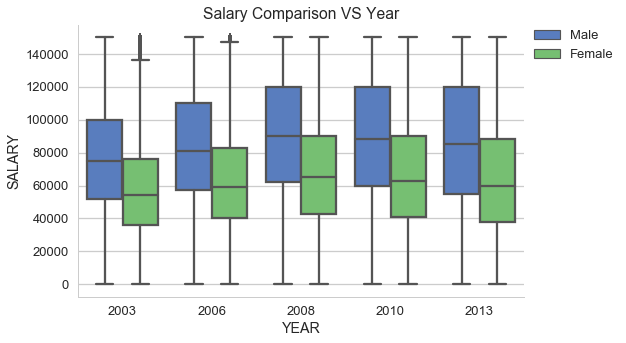

In [19]:
#bar plot of gender and salary 
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.boxplot(data=df, y = 'SALARY', x = 'YEAR', hue = 'GENDERS',hue_order=['Male','Female'], palette="muted", ax=ax)
sns.despine()
plt.title('Salary Comparison VS Year')
lgd=ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.tight_layout
plt.savefig('./../results/gendersalary.png',bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 150)


#### Several things we see: ####
1. The median, and the quatiles wages for men is about 30\% higher than women, for all years.
2. There is NO shrinking trend in the gender discrepancies in recent years. 
3. The mean wages increased from year 2003 to 2008. Then we see a small decrease from 2008 to 2013. This makes sense considering the financial crisis in 2008. It is intersting to see the magnitude and how long it has been affecting the job market. 

In the analysis below we take a closer look at the salaries over the years, with different highest degree groups for STEMers. 

## How is salary different for degree groups?##


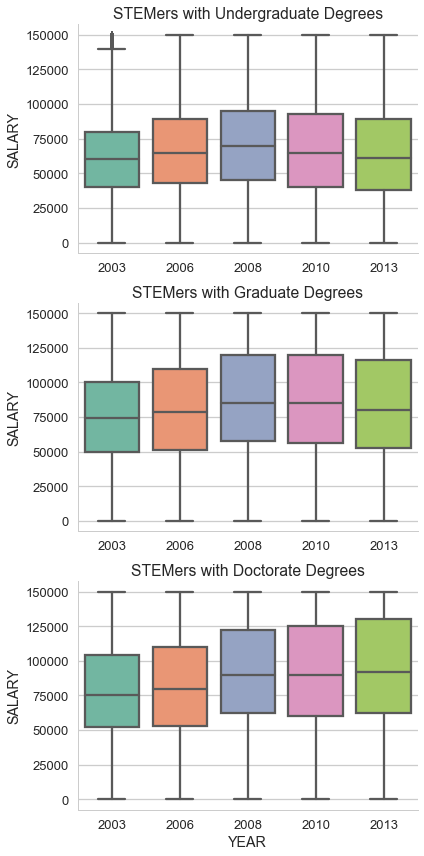

In [20]:
fig, axs = plt.subplots(nrows=3, figsize=(6,12))

#Plot undergraduate level salaries
sns.boxplot(data=df_undergraduate, y = 'SALARY', x = 'YEAR', palette="Set2", ax=axs[0])
axs[0].set_title('STEMers with Undergraduate Degrees')
axs[0].set_xlabel('')

#Plot graduate level salaries 
sns.boxplot(data=df_graduate, y = 'SALARY', x = 'YEAR', palette="Set2", hue_order=["Female", "Male"], ax=axs[1])
axs[1].set_title('STEMers with Graduate Degrees')
axs[1].set_xlabel('')


#Plot doctorate level salaries
sns.boxplot(data=df_dr, y = 'SALARY', x = 'YEAR', palette="Set2", ax=axs[2])
axs[2].set_title('STEMers with Doctorate Degrees')
axs[2].set_xlabel('YEAR')
sns.despine()

plt.tight_layout()

#### A close look: salary trend between 2003-2013 with degree group ####

First of all, let us just conclude all the above plots give a steady increase in salary from year 2003 to 2008. But things get intereting after 2008. 

In the first subplot above, we see the salaries for individuals with undergraduate highest degree. It clearly indicates the trending down after year 2008. So how about STEMers with graduate degrees?

The second subplot shows the salary boxplot with graduate degrees (master, doctorate, and professional degrees). It also presents the downward trend between these years. Perhaps, a even closer looks is required. What about STEMers with doctorate degrees? 

The last subplot contains data from only the doctorate group. Now we see a **difference**! This bar plot did not show a down trend. Instead, the mean salary for year 2010 kept about the same as 2008 and an even an increased in 2013. 

In a financial crisis like this, the doctorate group in average was influenced least and recovered fastest. It gives some insights to the need for highly specialized professionals from our society. 

The plot below gives the same information on the women data. 


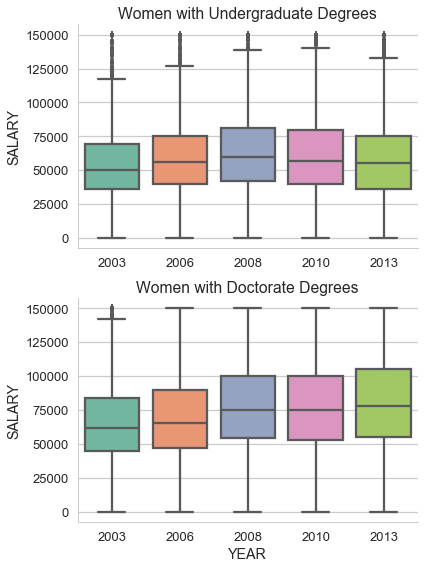

In [21]:
df_undergraduate = df_stem[(df_stem['DGRDG'] == 1)]
df_dr = df_stem[(df_stem['DGRDG'] == 3)]

fig, axs = plt.subplots(nrows=2, figsize=(6,8))

#Plot undergraduate level salaries
sns.boxplot(data=df_undergraduate[df_undergraduate['GENDERS']=='Female'], y = 'SALARY', x = 'YEAR', palette="Set2", ax=axs[0])
axs[0].set_title('Women with Undergraduate Degrees')
axs[0].set_xlabel('')


#Plot doctorate level salaries
sns.boxplot(data=df_dr[df_dr['GENDERS']=='Female'], y = 'SALARY', x = 'YEAR', palette="Set2", ax=axs[1])
axs[1].set_title('Women with Doctorate Degrees')
axs[1].set_xlabel('YEAR')
sns.despine()

plt.tight_layout()
plt.savefig('./../results/womensalary.png',dpi = 150)

## If an observation is from a minority group or not makes a difference in salary?##

The answer is YES. According to the survey data, a self-reported caucasion individual makes 19% more money in average than a minority individual. That is a significant difference. 

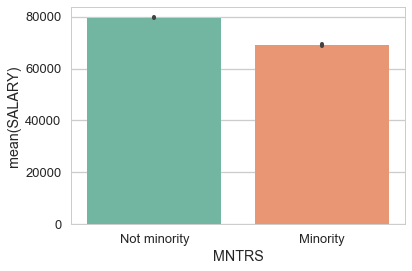

In [22]:
#Compare and visualize the minority factor
sns.barplot(data=df, y = 'SALARY', x = 'MNTRS', palette="Set2" )

## More detailed plot for the above plots?## 
The box plot blow shows the salary distribution for both genders groups and three race categories. It gives visualization for both year 2003 (left) and 2013 (right). 
We already know: a. Men make more than women. b. Non-minorities make more than minorities.
What is new: 
1. The pay gap between men and women exist in all race groups. 
2. The average salary for caucasion and asian men are about the same. The same story does not apply to women group: the average salary for asian women is higher than the rest of female race groups. 
3. None of the pay gaps shrunk between year 2013 and 2003 for each race groups. As a matter of fact, they all got worse in 2013, if not the same. 

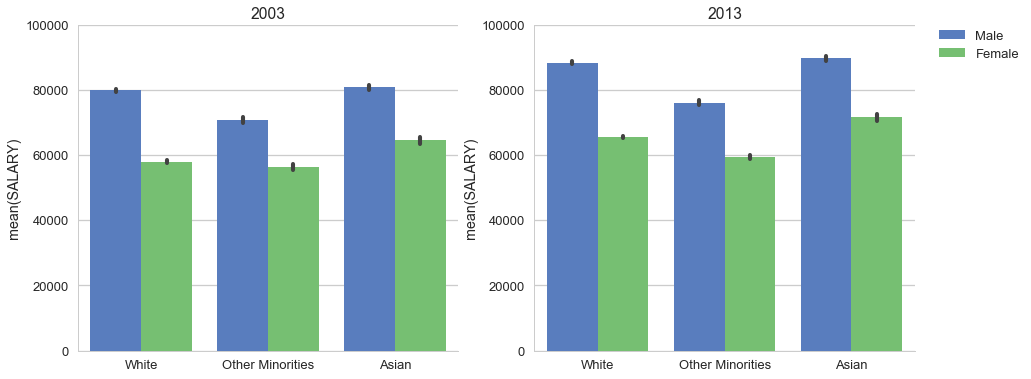

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))

#Compare and plot the SALARY of races and genders from year 2003 
sns.barplot(data=df[df['YEAR']==2003], y = 'SALARY', x = 'RACES', hue = 'GENDERS',hue_order=['Male','Female'], palette="muted", ax=axs[0])
axs[0].legend().remove()
axs[0].set_title('2003')
axs[0].set_xlabel('')
axs[0].set_ylim([0,100000])


#Compare and plot the SALARY of races and genders from year 2013 
sns.barplot(data=df[df['YEAR']==2013], y = 'SALARY', x = 'RACES', hue = 'GENDERS', hue_order=['Male','Female'], palette="muted", ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].set_title('2013')
axs[1].set_xlabel('')
axs[1].set_ylim([0,100000])
sns.despine()


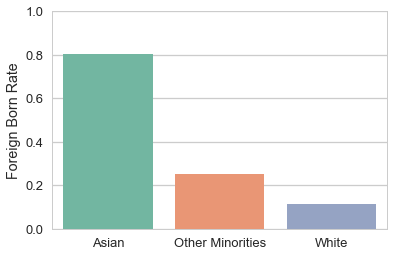

In [24]:
#countplot of entries of whether was born in US for each races.
df_bius = df.groupby('RACES')['BUSS'].value_counts(normalize=True).unstack().reset_index()
sns.barplot(x='RACES', y='Not in the US', data=df_bius, palette="Set2" )
plt.xlabel('')
plt.ylim([0,1])
plt.ylabel('Foreign Born Rate')

## What is unemployment rate of the female STEMers in different field of majors?##


In [25]:
employ_female_2003 = df_2003[df_2003['GENDERS']=='Female'].groupby('MajorS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

In [26]:
employ_female_2013 = df_2013[df_2013['GENDERS']=='Female'].groupby('MajorS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

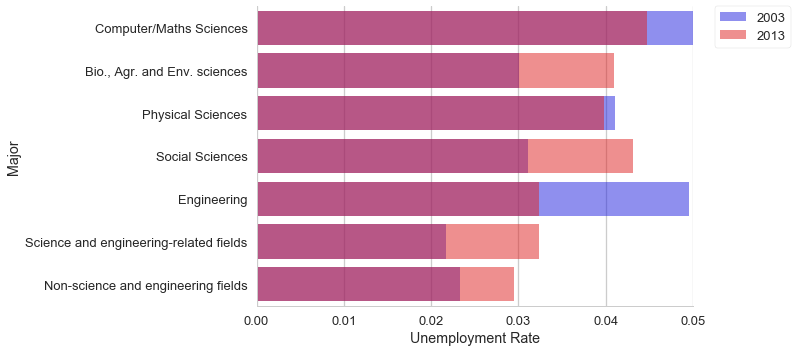

In [27]:
fig, axs = plt.subplots(figsize=(10,5))
field_order = ['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields']
#Compare and plot the employment percentage for male and female college graduates
sns.set_color_codes("pastel")
sns.barplot( x="Unemployed",y="MajorS", order = field_order, alpha=0.5, data=employ_female_2003, color='blue', label='2003')


#Compare and plot the employment percentage for male and female doctor graduates
sns.set_color_codes("pastel")
sns.barplot(x="Unemployed", y="MajorS", order = field_order, alpha=0.5, data=employ_female_2013, color='red', label='2013')
axs.set(xlim=(0, 0.05), ylabel="Major",
       xlabel="Unemployment Rate")
sns.despine()
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=True)
plt.tight_layout()


The plot shows the female unemployment rate for field of major groups in 2003 and 2013. 
Things worth noticing:
1. The unemployment rate for non-science and engineering fields major remained lowest both years. A closer look reveals this group contains job title such as 'Management' and 'Administration'. 
2. There is a significant decrease in the unemployment rate for the female engineering group (from 5% to 3%). 
3. The unemployment rate of another group who saw an decrease from 2003 to 2013 is computer/maths sciences and physical science. All the other group either remained a similar or received a higher unemployment rate.

## How many male and female worker are there in STEM job fields? ## 


In [28]:
df_job_gender = df.groupby('JobS')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
df_job_gender_melt = pd.melt(df_job_gender, id_vars ='JobS')

In [29]:
job_order = ['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields']

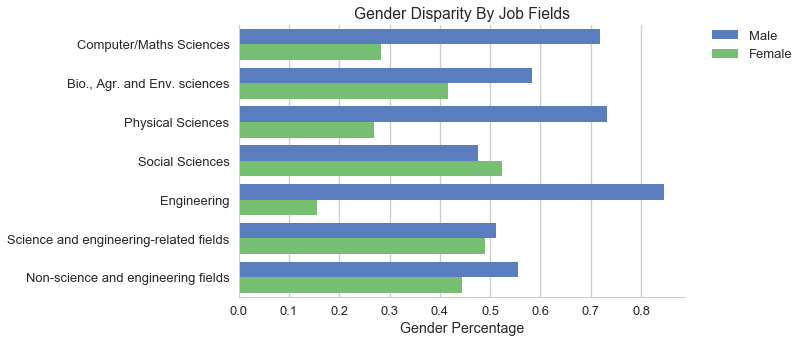

In [30]:
#Compare and plot the gender percentage in STEM jobs.
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.barplot(y='JobS', x='value', data=df_job_gender_melt, hue='GENDERS', hue_order=['Male','Female'], ax=ax, order=job_order, palette="muted")
plt.title('Gender Disparity By Job Fields')
plt.xlabel('Gender Percentage')
plt.ylabel('')
lgd=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('./../results/genderdisparitybyfield.png',bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 150)
#look at detailed group for explanation https://highered.ipums.org/highered-action/variables/NOCPR#codes_section 

** Wow! The job fields that have the most gender imbalance are: engineering, computer/maths sciences and physical sciences. There are four point six men for each woman working in Engineering field!**

## What is the pay disparity by genders and fields? ## 

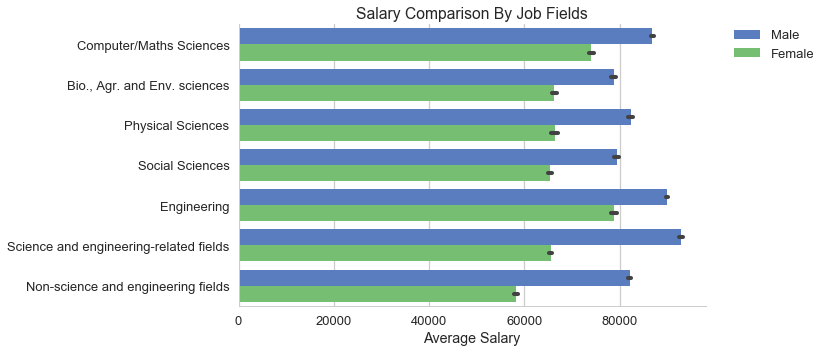

In [31]:
#plot of salary VS type of job 
fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.barplot(y="JobS", x="SALARY", data=df, hue="GENDERS", order=job_order, hue_order=['Male','Female'],ax=ax, palette="muted")
lgd=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Salary Comparison By Job Fields')

plt.xlabel('Average Salary')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.savefig('./../results/salarycomparisonbyfield.png',bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 150)

Several insights:
1. The job fields that have the least pay gap between men and women are: engineering, computer/maths sciences and bio/life sciences. 
2. Engineering field gives the best compensation to their female employees compared with other jobs. 
3. On the contrary, the lowest pay check for females goes to non-science and engineering field. The discrepancy in the compensation for male and female groups also goes to the same field. Recall that this group contains job title such as 'Management' and 'Administration'. This could be indicating the even severe gender disparity in management positions. 

## Are there differences in job satisfaction between genders? ## 
 

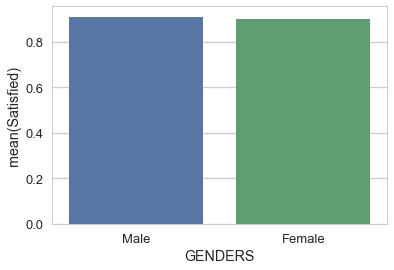

In [32]:
#how many people are satisfied with their jobs
df_graduate_satisfy = df.groupby('GENDERS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()
sns.barplot(x='GENDERS', y='Satisfied', data=df_graduate_satisfy, order=['Male','Female'],)

#### It does not seem to have much a difference in job satisfaction between men and women, judging from the plot above. ####

Now let us take a detailed look at the women job satisfaction rate for different job fields. 


## What is the satisfaction rate for women in the STEM jobs?###

 

In [33]:
employ_female_2003_job_stis = df_2003[df_2003['GENDERS']=='Female'].groupby('JobS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()
employ_female_2013_job_stis = df_2013[df_2013['GENDERS']=='Female'].groupby('JobS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()

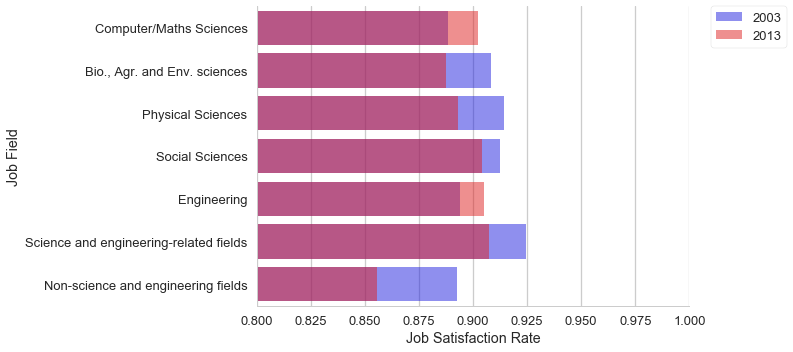

In [34]:
fig, axs = plt.subplots(figsize=(10,5))

#Compare and plot the employment percentage for male and female college graduates
sns.set_color_codes("pastel")
sns.barplot(y="JobS", x="Satisfied", order=job_order, alpha=0.5, data=employ_female_2003_job_stis, color='blue', label='2003')


#Compare and plot the employment percentage for male and female doctor graduates
sns.set_color_codes("muted")
sns.barplot(x="Satisfied", y="JobS", order=job_order, alpha=0.5, data=employ_female_2013_job_stis, color='red', label='2013')
axs.set(xlim=(0.8, 1), ylabel="Job Field",
       xlabel="Job Satisfaction Rate")
sns.despine()
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=True)
plt.tight_layout()

We see a slight increase in job satisfaction rate for ladies working in engineering and computer/maths sciences. 

The rest of the fields see less women reporting satisfaction with their jobs, with non-science and engineering fields makes the largest decrease of 4%.

## Summary

In this notebook, we took a deep dive into the leading STEM survey data from Scientists and Engineers Statistical Data System (SESTAT). We put our focus on the gender gap in the unemployment rate, pay as well as principal job fields.

A few highlights from the EDA part of this project:
1. Women have been more active in the STEM job field over the years.
2. There is an apparent gender umployment gap and gender pay gap from this survey results.
3. Despite the noticable gender gaps, both genders report similar job satisaction rate. 
3. The situation could be different for different principal job fields. 